<a href="https://colab.research.google.com/github/sankalpbhatia2003/Speech-Emotion-Analyzer/blob/master/emotion_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [72]:
from keras import regularizers

In [73]:
import os

In [74]:
# Path to RAVDESS Dataset
Ravdess = "/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24" #"/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24" 

In [75]:
mylist= os.listdir(Ravdess)

**Plotting the audio file's waveform and spectograph**

In [76]:
data, sampling_rate = librosa.load("/content/drive/MyDrive/Sun Life Financial Audio Files/November '22/Manjit Singh/audio_1.wav")

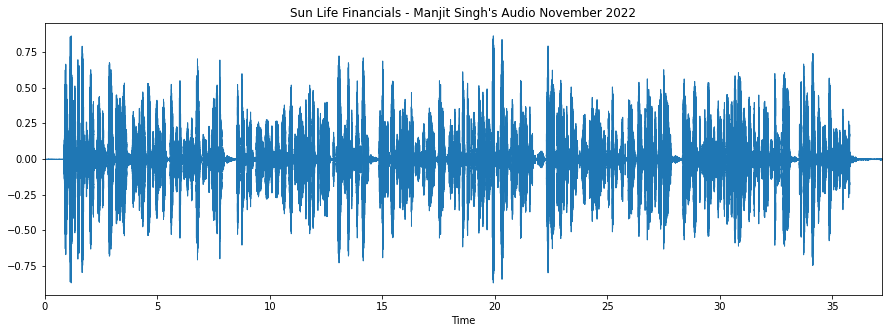

In [77]:
#% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
plt.title('Sun Life Financials - Manjit Singh\'s Audio November 2022')
librosa.display.waveplot(data, sr=sampling_rate)

**Creating a Spectogram**

In [78]:
def create_spectrogram(data, sr):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

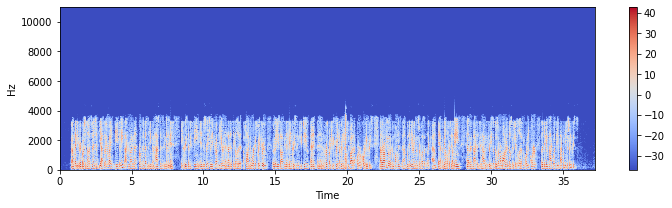

In [79]:
data, sampling_rate = librosa.load("/content/drive/MyDrive/Sun Life Financial Audio Files/November '22/Manjit Singh/audio_1.wav")
create_spectrogram(data, sampling_rate)

**Setting the labels**

In [80]:
Ravdess = "/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24"

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    #print(str(Ravdess) + str(dir))
    print(str(Ravdess) + '/' + str(dir))
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        #print(part[2])
        #print(file)
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
#/content/drive/MyDrive/Voice Training Data /Actor_01/03-01-01-01-01-01-01.wav
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head(50)

/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_21
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_04
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_19
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_03
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_17
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_18
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_20
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_16
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_11
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_10
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_15
/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_13
/content/drive/MyDrive/Voice Training Data /audio_sp

,Emotions,Path
0,neutral,/content/drive/MyDrive/Voice Training Data /au...
1,neutral,/content/drive/MyDrive/Voice Training Data /au...
2,calm,/content/drive/MyDrive/Voice Training Data /au...
3,calm,/content/drive/MyDrive/Voice Training Data /au...
4,neutral,/content/drive/MyDrive/Voice Training Data /au...
5,neutral,/content/drive/MyDrive/Voice Training Data /au...
6,calm,/content/drive/MyDrive/Voice Training Data /au...
7,calm,/content/drive/MyDrive/Voice Training Data /au...
8,calm,/content/drive/MyDrive/Voice Training Data /au...
9,disgust,/content/drive/MyDrive/Voice Training Data /au...


In [81]:
# Saving the above dataframe as data_path
data_path = Ravdess_df
print(data_path)

      Emotions                                               Path
0      neutral  /content/drive/MyDrive/Voice Training Data /au...
1      neutral  /content/drive/MyDrive/Voice Training Data /au...
2         calm  /content/drive/MyDrive/Voice Training Data /au...
3         calm  /content/drive/MyDrive/Voice Training Data /au...
4      neutral  /content/drive/MyDrive/Voice Training Data /au...
...        ...                                                ...
1435  surprise  /content/drive/MyDrive/Voice Training Data /au...
1436   disgust  /content/drive/MyDrive/Voice Training Data /au...
1437   disgust  /content/drive/MyDrive/Voice Training Data /au...
1438  surprise  /content/drive/MyDrive/Voice Training Data /au...
1439      fear  /content/drive/MyDrive/Voice Training Data /au...

[1440 rows x 2 columns]


**Data Augmentation**

In [82]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)

#/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_21/03-01-01-01-02-02-21.wav

/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_21/03-01-01-01-02-02-21.wav


**Feature Extraction**

In [83]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [66]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [94]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [95]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

ValueError: ignored

**Data Preparation**

In [96]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

KeyError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [97]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1, 1), (3240, 8), (1080, 162, 1, 1), (1080, 8))

**Modelling**

In [98]:
from keras.optimizers import Adam

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# REMOVE THIS ADDITION IF REQUIRED

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
#optimizer = Adam(lr=0.001)
# optimizer = 'adam' (earlier)
model.compile(optimizer = Adam(lr=0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 81, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_30 (Conv1D)          (None, 81, 256)           327936    
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 21, 128)         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [99]:
from keras.callbacks import ReduceLROnPlateau

es = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True, #False
    start_from_epoch=10
)

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp, es])

Epoch 1/50
203/203 [==============================] - 2s 8ms/step - loss: 1.9845 - accuracy: 0.2031 - val_loss: 1.9742 - val_accuracy: 0.1657 - lr: 0.0010
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 1.8933 - accuracy: 0.2525 - val_loss: 1.7483 - val_accuracy: 0.3167 - lr: 0.0010
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 1.8131 - accuracy: 0.2846 - val_loss: 1.7608 - val_accuracy: 0.3009 - lr: 0.0010
Epoch 4/50
203/203 [==============================] - 1s 7ms/step - loss: 1.7301 - accuracy: 0.3302 - val_loss: 1.6746 - val_accuracy: 0.3426 - lr: 0.0010
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 1.6898 - accuracy: 0.3420 - val_loss: 1.6432 - val_accuracy: 0.3556 - lr: 0.0010
Epoch 6/50
203/203 [==============================] - 1s 7ms/step - loss: 1.6477 - accuracy: 0.3596 - val_loss: 1.6145 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 7/50
203/203 [==============================] - 1s 7ms/step - lo

In [100]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 5ms/step - loss: 1.7019 - accuracy: 0.6148
Accuracy of our model on test data :  61.4814817905426 %


In [101]:
print("Actual number of epochs run: ", len(history.epoch))

Actual number of epochs run:  50


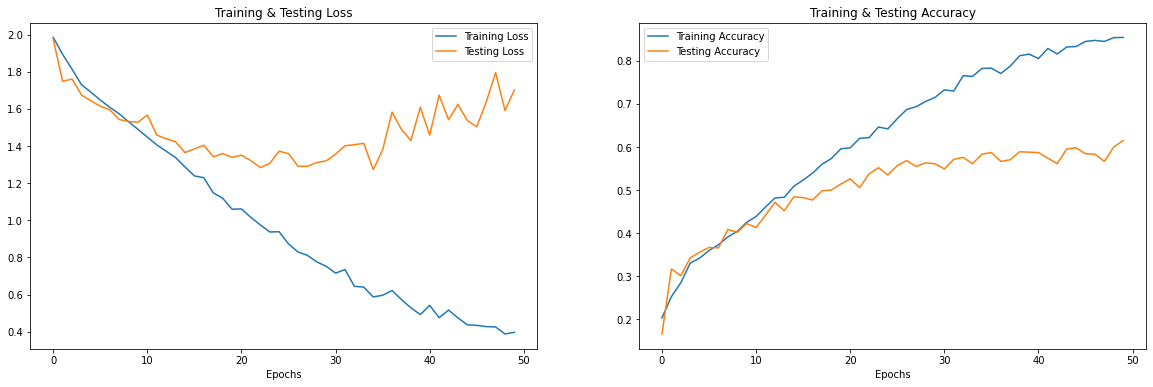

In [102]:
epochs = [i for i in range(len(history.epoch))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [103]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 [==============================] - 0s 4ms/step


In [104]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,disgust,happy
2,disgust,disgust
3,sad,sad
4,calm,neutral
5,surprise,surprise
6,calm,calm
7,disgust,disgust
8,happy,disgust
9,calm,calm


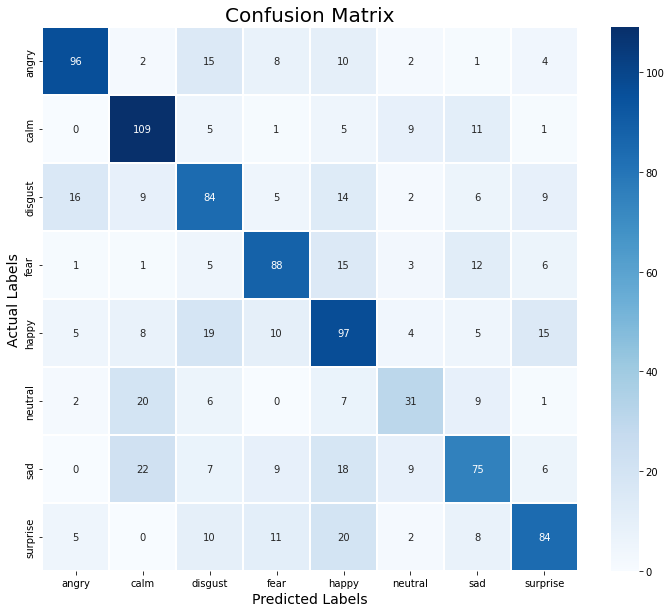

In [105]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.70      0.73       138
        calm       0.64      0.77      0.70       141
     disgust       0.56      0.58      0.57       145
        fear       0.67      0.67      0.67       131
       happy       0.52      0.60      0.56       163
     neutral       0.50      0.41      0.45        76
         sad       0.59      0.51      0.55       146
    surprise       0.67      0.60      0.63       140

    accuracy                           0.61      1080
   macro avg       0.61      0.60      0.61      1080
weighted avg       0.62      0.61      0.61      1080



**Saving the model**

In [107]:
import os
model_name = 'Emotion_Voice_Detection_Model_2.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model_2.h5 


In [108]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Passing new audio through the model**



In [109]:
data, sampling_rate = librosa.load("/content/drive/MyDrive/Sun Life Financial Audio Files/November '22/Manjit Singh/audio_1.wav")

In [110]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load("/content/drive/MyDrive/Sun Life Financial Audio Files/November '22/Manjit Singh/audio_1.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [111]:
livedf2= pd.DataFrame(data=livedf2)
livedf2.shape

(216, 1)

In [112]:
livedf2 = livedf2.stack().to_frame().T

In [113]:
livedf2
print((livedf2).shape)

(1, 216)


In [114]:
twodim_old= np.expand_dims(livedf2, axis=2)

Extra editing

In [115]:
print(twodim_old.shape)

(1, 216, 1)


In [116]:
twodim = twodim_old[:, :162, :]

In [117]:
print(twodim.shape)

(1, 162, 1)


Loading Model

In [118]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model_2.h5")
print("Loaded model from disk")

Loaded model from disk


In [129]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 20ms/step


In [130]:
print(livepreds)

[[1.9699245e-27 0.0000000e+00 9.6356020e-30 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [131]:
livepreds1=livepreds.argmax(axis=1)

In [132]:
liveabc = livepreds1.astype(int).flatten()

In [133]:
liveabc

array([4])

In [134]:
#from sklearn.preprocessing import LabelEncoder

lb = encoder

#liveabc = liveabc.reshape(1, -1)
livepredictions = (lb.inverse_transform((livepreds)))

In [135]:
livepredictions

array([['happy']], dtype=object)